<center><img src="images/logo.png" alt="drawing" width="400" style="background-color:white; padding:1em;" /></center> <br/>

# Application of Deep Learning to Text and Images
## Module 3, Lab 1: Reading image data to find descriptors and create plots

This notebook will show you how to open and read image data using Python and PyTorch, extract features from images and you will learn how to plot images.

You will learn the following:

- How to import image data
- How to extract features from image data
- How to plot image data

----

You will be presented withz challenges throughout the notebook: <br/>

| <img style="float: center;" src="images/challenge.png" alt="Challenge" width="125"/>|
| --- |
|<p style="text-align:center;">Challenges are where you can practice your coding skills.</p>


## Index

- [Reading Images](#Reading-Images)
- [Inspecting Images](#Inspecting-Images)
- [Extracting Features](#Extracting-Features)

In [1]:
# installing libraries
!pip install -U -q -r requirements.txt

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset

import sys

sys.path.insert(1, "..")
from MLUDTI_EN_M3_Lab1_quiz_questions import *

## Reading Images
In this section you are going to learn how to open images using Python and how to inspect those images. 

### PyTorch Image Datasets

First, load the CIFAR10 data. This is one of many image datasets that can be loaded in directly with `torchvision`.

In [3]:
%%capture

# Get the training images
img_train = torchvision.datasets.CIFAR10(
    root="data",
    download=True,
    train=True,
    transform=transforms.ToTensor(),
)

# Get the test images
img_test = torchvision.datasets.CIFAR10(
    root="data",
    download=True,
    train=False,
    transform=transforms.ToTensor(),
)

### Inspecting an Image

You can look at one example data point by specifying the ID of the image you want to retrieve. As result, you get a tuple of `(image, label)`. If you call `image.shape` you can see how many color channels the image contains, the height, and width: `[color channels, height, width]`. 

In [4]:
# Print the image and label at the 42nd index
image, label = img_train[42]
print(image.shape, "Label: ",label)

torch.Size([3, 32, 32]) Label:  2


The output above tells you 4 things:
1. This is a color image with __3__ channels.
1. The height of the image is __32__ px.
1. The width of the image is __32__ px.
1. Time image lable is __2__.

### Images as Tensors

PyTorch has a constructor that creates a `Dataset` object from a list of tensors similar to what you saw above: 

`torch.utils.data.TensorDataset`

This is simply a tensor data construct that allows you to access individual images (or batches of images) and their labels easily.

To create a TensorDataset you need to pass the images (data_tensor) and labels (target_tensor) into `Dataloader`.

In [5]:
# Take the first 50 example images from the training 
# dataset and their corresponding labels

data_tensor = torch.Tensor(img_train.data[:50])
target_tensor = torch.Tensor(img_train.targets[:50])

tensor_dataset = TensorDataset(data_tensor, target_tensor)

print(tensor_dataset)

### Loading an Image Dataset

Now that you have created a PyTorch tensor dataset, you need to learn what you can do with it. The first question is, how can you access individual or multiple images in the tensor dataset? 

Images can be accessed using a dataloader. `torch.utils.data.DataLoader` takes a `TensorDataset` object as input, and allows you to iterate through minibatches of your data. 

`torch.utils.data.DataLoader` has arguments such as:

* `batch_size` - sets the batch size
* `shuffle` - boolean that determines whether to vend the data in a random order, or iterate in order
* `drop_last` - set to True to drop the last incomplete batch, if the dataset size is not divisible by the batch size. If False and the size of dataset is not divisible by the batch size, then the last batch might be smaller. This can be helpful if your models requires batches to be exactly the same size for each iteration. 

Now, use the tensor dataset you created with 50 example images with a `DataLoader` to create batches of `32` images from the CIFAR10 data.

In [6]:
dataloader = torch.utils.data.DataLoader(
    tensor_dataset, batch_size=32, shuffle=True, drop_last=False
)

In [7]:
for data, labels in dataloader:
    print(data.shape)

torch.Size([32, 32, 32, 3])
torch.Size([18, 32, 32, 3])


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [8]:
question_1

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h2><i>Try it Yourself!</i></h2>
    <br>
    <img style="float: center;" src="images/challenge.png" alt="Challenge" width="100" />
    <p style="text-align: center; margin: auto;">Update the <code>DataLoader</code> code and set <code>drop_last=True</code>. </p>
    <p style="text-align: center; margin: auto;">How many batches do you think will be created? Check your answer</p>
</div>

In [9]:
# Create a dataloader that drops incomplete batches and 
# print the data shapes for each batch
########## CODE HERE ###############

dataloader = torch.utils.data.DataLoader(
    tensor_dataset, batch_size=32, shuffle=True, drop_last=True
)

for data, labels in dataloader:
    print(data.shape)

########## END OF CODE ##########

torch.Size([32, 32, 32, 3])


## Inspecting Images

Now that you have loaded the images and created batches you are ready to inspect the images. This next section will show you how to separate images into different color channels.

[[[0.49803922 0.5803922  0.7529412  ... 0.4392157  0.5647059  0.6       ]
  [0.34901962 0.43529412 0.5921569  ... 0.6313726  0.6509804  0.6392157 ]
  [0.38431373 0.36862746 0.43137255 ... 0.6784314  0.6627451  0.6784314 ]
  ...
  [0.6117647  0.5921569  0.58431375 ... 0.5882353  0.58431375 0.5568628 ]
  [0.6392157  0.63529414 0.6313726  ... 0.5294118  0.5529412  0.5411765 ]
  [0.627451   0.627451   0.6392157  ... 0.5411765  0.56078434 0.5921569 ]]

 [[0.49411765 0.5647059  0.70980394 ... 0.4        0.5294118  0.5568628 ]
  [0.3529412  0.43137255 0.5529412  ... 0.59607846 0.61960787 0.6039216 ]
  [0.36862746 0.36862746 0.42745098 ... 0.62352943 0.6039216  0.6156863 ]
  ...
  [0.59607846 0.5686275  0.5647059  ... 0.5647059  0.5803922  0.56078434]
  [0.61960787 0.60784316 0.5921569  ... 0.5137255  0.5372549  0.5254902 ]
  [0.59607846 0.5921569  0.6        ... 0.4745098  0.5137255  0.5294118 ]]

 [[0.5058824  0.5647059  0.6862745  ... 0.38431373 0.48235294 0.50980395]
  [0.36862746 0.454901

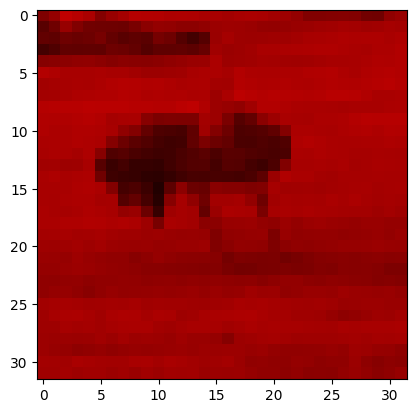

In [10]:
# You can convert from an an image object to an array using np.asarray
# to be able to look at the pixel values and manipulate them
img_array = np.asarray(image)
# Print the pixel values
print(img_array)

# Given the tensor representing the image, 
# use .permute() to put the channels as the last dimension:
plt.imshow(image.permute(1, 2, 0))

# Check that the color ordering matches what is expect (RGB)

# Zeroing out channels 1 and 2 should show the red color channel 
# Note: Remember that Python uses 0 index so the red channel is number 0
red = image.permute(1, 2, 0).detach().clone()

red[:, :, 1] = 0
red[:, :, 2] = 0
plt.imshow(red)


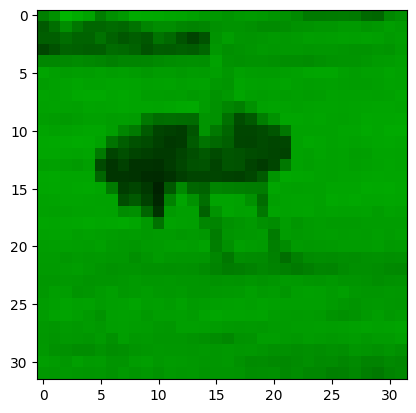

In [11]:
# Zero out channels 0 and 2 to see an image with green hues

green = image.permute(1, 2, 0).detach().clone()

green[:, :, 0] = 0
green[:, :, 2] = 0

plt.imshow(green)

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h2><i>Try it Yourself!</i></h2>
    <br>
    <img style="float: center;" src="images/challenge.png" alt="Challenge" width="100" />
    <p style="text-align: center; margin: auto;">Print an image with only blue hues.
</div>

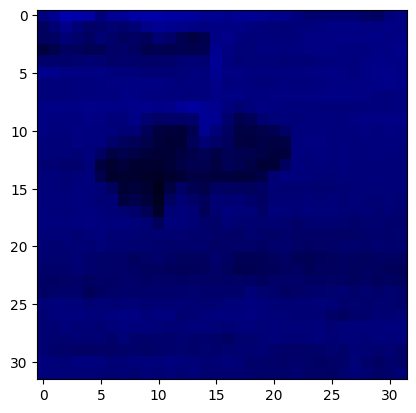

In [12]:
# Zero out the correct channels to see an image with blue hues
########## CODE HERE ###############
blue = image.permute(1, 2, 0).detach().clone()

blue[:, :, 0] = 0
blue[:, :, 1] = 0

plt.imshow(blue)


########## END OF CODE ##########

## Extracting Features

The next step is to learn how to extract features from the image. You can do this by applying a convolutional layer and a Laplace filter. The Laplacian of an image highlights regions of rapid intensity change and is therefore often used for edge detection.

In [13]:
# Initialize a convolutional layer using PyTorch
conv2d = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=1, bias=False)

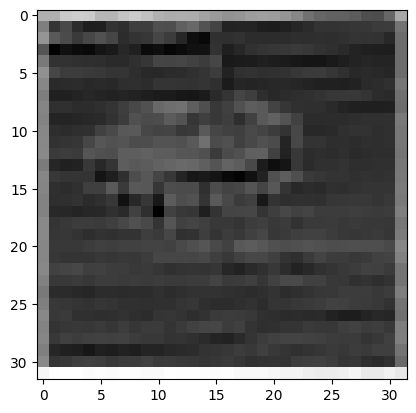

In [14]:
# Plot the resulting feature map as a grayscale image
plt.imshow(conv2d(image).permute(1, 2, 0).detach().numpy(), cmap="gray")

In [15]:
# Use nn.Conv2d to apply a 3x3 Laplace filter to the image
laplace = torch.Tensor([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
laplace_kernel = torch.stack((laplace, laplace, laplace), dim=0).unsqueeze(0)

# Set weights of convolutional layer to the Laplace kernel
laplace_conv2d = nn.Conv2d(
    in_channels=3, out_channels=1, kernel_size=3, padding=1, bias=False
)
laplace_conv2d.weight.data = laplace_kernel
laplace_conv2d.weight.requires_grad = False

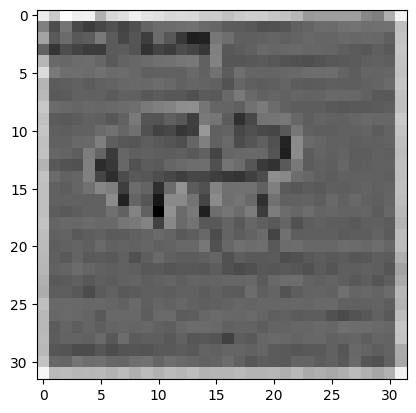

In [16]:
# Plot the resulting feature map as a grayscale image
plt.imshow(laplace_conv2d(image).permute(1, 2, 0).detach().numpy(), cmap="gray")

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [17]:
question_2

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h2><i>Try it Yourself!</i></h2>
    <br>
    <img style="float: center;" src="images/challenge.png" alt="Challenge" width="100" />
    <p style="text-align: center; margin: auto;">Try to create a new filter using a sharpening kernel:
\begin{bmatrix}
\ \ 0 & -1 & \ \ 0 \\
-1 & \ \ 5 & -1 \\
\ \ 0 & -1 & \ \ 0
\end{bmatrix}
.
</div>

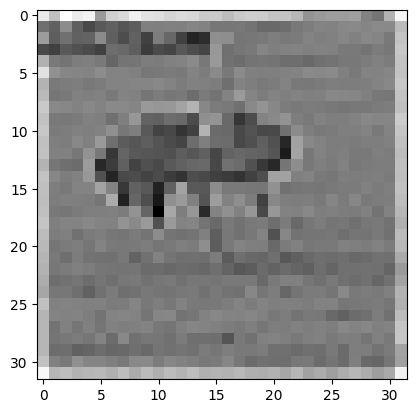

In [18]:
# Create a tensor that holds the sharpening kernel
# Then set the weights of the convolutional to use the sharpening kernel
########## CODE HERE ###############

sharpen = torch.Tensor([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpen_kernel = torch.stack((sharpen, sharpen, sharpen), dim=0).unsqueeze(0)

sharpen_conv2d = nn.Conv2d(
    in_channels=3, out_channels=1, kernel_size=3, padding=1, bias=False
)
sharpen_conv2d.weight.data = sharpen_kernel
sharpen_conv2d.weight.requires_grad = False

# Plot the resulting feature map as a grayscale image
plt.imshow(sharpen_conv2d(image).permute(1, 2, 0).detach().numpy(), cmap="gray")

########## END OF CODE ##########

Every kernel will have a different impact on the image. The Laplace and sharpening kernels are well know and commonly used, but there are many others you can try to enhance the data.

----
## Conclusion

This notebook is meant to be a quick way to get you up-to-speed with loading images, creating `TensorDatasets` and extracting features from images using simple filters.

--- 
## Next Lab: The concept of convolution
In the next lab, you will learn how to build a Convolutional Neural Network (CNN) by using built-in CNN architectures in [PyTorch](https://pytorch.org/docs/stable/index.html) to train a multiclass classification model on a real-world dataset.